# Cats or dogs

The ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) from Kaggle is used here. 

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-08-27 20:08:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   127MB/s    in 0.5s    

2020-08-27 20:08:55 (127 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

zip_path = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
cd '/tmp/cats_and_dogs_filtered'

/tmp/cats_and_dogs_filtered


In [4]:
ls

train/  validation/  vectorize.py


In [5]:
cd train

/tmp/cats_and_dogs_filtered/train


In [6]:
ls

cats/  dogs/


So we can see there are two ordners containing training images and validation images. And furthermore, in these two ordners the images are stored according to its label. 

In [7]:
# make directory path for later using data generator from directory
train_dir = os.path.join('/tmp/cats_and_dogs_filtered', 'train')
validation_dir = os.path.join('/tmp/cats_and_dogs_filtered', 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [8]:
# check the total numbers of images under each label
print("total number of training cats images: ", len(os.listdir(train_cats_dir)))
print("total number of training dogs images: ", len(os.listdir(train_dogs_dir)))
print("total number of validation cats images: ", len(os.listdir(validation_cats_dir)))
print("total number of validation dogs images: ", len(os.listdir(validation_dogs_dir)))

total number of training cats images:  1000
total number of training dogs images:  1000
total number of validation cats images:  500
total number of validation dogs images:  500


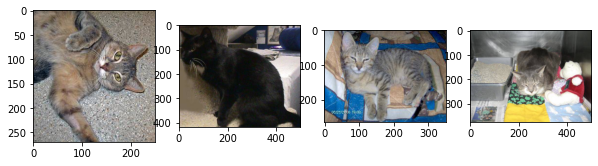

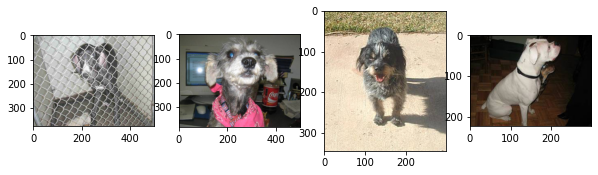

In [9]:
# plot some image examples from the training set
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)

def plot_img(num, dir, names):
  plt.figure(figsize=(10,40))
  for i in range(num):
    index = np.random.randint(1000)
    path = os.path.join(dir, names[index])
    img = mpimg.imread(path)
    plt.subplot(1, num, i+1)
    plt.imshow(img)


plot_img(4, train_cats_dir, train_cats_names)
plot_img(4, train_dogs_dir, train_dogs_names)

we can see that the images are in different size.

# Build Model

In [10]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [11]:
model = keras.Sequential([
  Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
  MaxPooling2D(2,2),
  Conv2D(32, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(256, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# Creates data flow using generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(150,150)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    class_mode='binary',
    target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=62,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
62/62 [==============================] - 9s 144ms/step - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6392 - val_accuracy: 0.6420
Epoch 2/10
62/62 [==============================] - 9s 139ms/step - loss: 0.6437 - accuracy: 0.6372 - val_loss: 0.6095 - val_accuracy: 0.6740
Epoch 3/10
62/62 [==============================] - 8s 137ms/step - loss: 0.5701 - accuracy: 0.6951 - val_loss: 0.5716 - val_accuracy: 0.7050
Epoch 4/10
62/62 [==============================] - 9s 137ms/step - loss: 0.5077 - accuracy: 0.7536 - val_loss: 0.5735 - val_accuracy: 0.7050
Epoch 5/10
62/62 [==============================] - 9s 139ms/step - loss: 0.4444 - accuracy: 0.7856 - val_loss: 0.5739 - val_accuracy: 0.7060
Epoch 6/10
62/62 [==============================] - 8s 137ms/step - loss: 0.3844 - accuracy: 0.8293 - val_loss: 0.6256 - val_accuracy: 0.7140
Epoch 7/10
62/62 [==============================] - 9s 139ms/step - loss: 0.2896 - accuracy: 0.8714 - val_loss: 0.7584 - val_accuracy: 0.6830
Epoch 

# Predict

In [24]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")


Saving dog-2785074__340.jpg to dog-2785074__340 (6).jpg
User uploaded file "dog-2785074__340.jpg" with length 32039 bytes
[1.]
dog-2785074__340.jpg is a dog


# Data augumentation

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-27 20:48:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   218MB/s    in 0.7s    

2020-08-27 20:48:30 (218 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-27 20:48:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148018

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()


train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

## Build model

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Data augumentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Here the validation data is used as test data, so not the same preprocessing method as training set
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/', 
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/', 
        target_size=(300, 300), 
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/50
8/8 [==============================] - 19s 2s/step - loss: 0.7629 - accuracy: 0.5284 - val_loss: 0.6860 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 18s 2s/step - loss: 0.6873 - accuracy: 0.6029 - val_loss: 0.6816 - val_accuracy: 0.5430
Epoch 3/50
8/8 [==============================] - 18s 2s/step - loss: 0.6191 - accuracy: 0.6863 - val_loss: 1.4638 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 18s 2s/step - loss: 0.5055 - accuracy: 0.7353 - val_loss: 1.4023 - val_accuracy: 0.5820
Epoch 5/50
8/8 [==============================] - 18s 2s/step - loss: 0.4253 - accuracy: 0.8020 - val_loss: 1.7706 - val_accuracy: 0.5938
Epoch 6/50
8/8 [==============================] - 18s 2s/step - loss: 0.3946 - accuracy: 0.8065 - val_loss: 3.2841 - val_accuracy: 0.5469
Epoch 7/50
8/8 [==============================] - 18s 2s/step - loss: 0.3433 - accuracy: 0.8343 - val_loss: 2.5812 - val_accuracy: 0.5820
Epoch 8/50
8/8 [==================

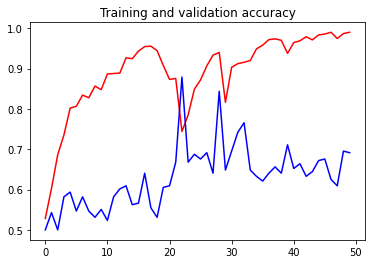

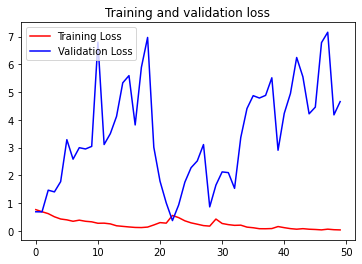

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()